# Pymaceuticals Inc.
---

### Analysis

- Drug Regimen Ramicane and Capomulin have the best results with the lowest tumor volume over time. 
- Reviewing a single test mouse you can determin the process of Capomulin treatment progressed positively but the last few timepoints show a slight increase of the tumor.
- Data regarding mouse weight vs. the average observed tumor volume show there is a correlation between weight and the tumor.  The higher the weight the higher the tumor volume.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')


# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice.
count_mouse = len(mouse_study_df["Mouse ID"].unique())
count_mouse

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint_dup = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])]
# print(mouse_timepoint_dup)

unique_mouseid = pd.DataFrame({"Mouse ID": mouse_timepoint_dup["Mouse ID"].unique()})
unique_mouseid


,Mouse ID
0,g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid = mouse_study_df.loc[mouse_study_df["Mouse ID"]== str(unique_mouseid.iloc[0,0]),:]
duplicate_mouseid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouseid_index = duplicate_mouseid.index
# duplicate_mouseid_index 
clean_mouseid_df = mouse_study_df.drop(duplicate_mouseid_index)
clean_mouseid_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mouseid = len(clean_mouseid_df["Mouse ID"].unique())
clean_mouseid

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_volume_mean = clean_mouseid_df["Tumor Volume (mm3)"].groupby(clean_mouseid_df["Drug Regimen"]).mean()
# tumor_volume_mean
tumor_volume_median = clean_mouseid_df["Tumor Volume (mm3)"].groupby(clean_mouseid_df["Drug Regimen"]).median()
# tumor_volume_median
tumor_volume_variance = clean_mouseid_df["Tumor Volume (mm3)"].groupby(clean_mouseid_df["Drug Regimen"]).var()
# tumor_volume_variance
tumor_volume_stddev = clean_mouseid_df["Tumor Volume (mm3)"].groupby(clean_mouseid_df["Drug Regimen"]).std()
# tumor_volume_stddev
tumor_volume_sem = clean_mouseid_df["Tumor Volume (mm3)"].groupby(clean_mouseid_df["Drug Regimen"]).sem()
# tumor_volume_sem

stat_summary = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,
                            "Median Tumor Volume": tumor_volume_median,
                            "Tumor Volume Variance": tumor_volume_variance,
                            "Tumor Volume Std. Dev.": tumor_volume_stddev,
                            "Tumor Volume Std. Err": tumor_volume_sem})

stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stat_summary = clean_mouseid_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
agg_stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

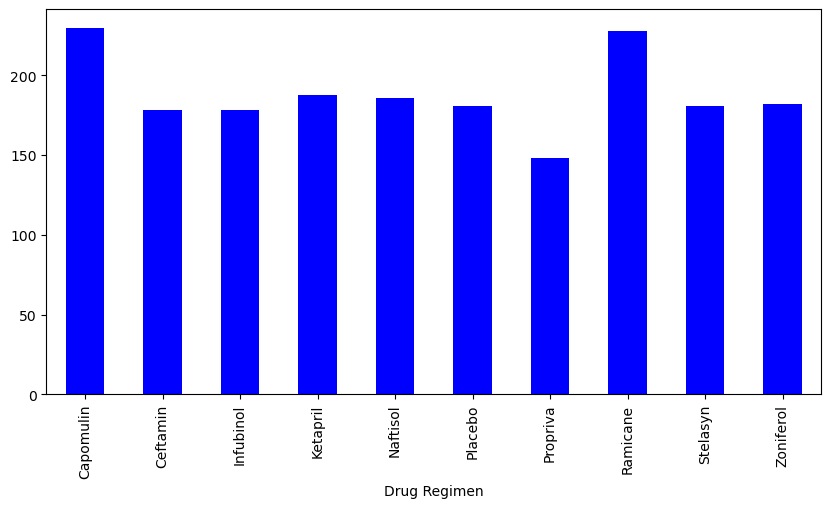

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# group_count_mouse = clean_mouseid_df.groupby(["Drug Regimen"])[["Mouse ID","Timepoint"]].count()
group_count_mouse = clean_mouseid_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
# group_count_mouse
group_count_mouse.plot.bar(figsize=(10,5), color='b')
plt.show()

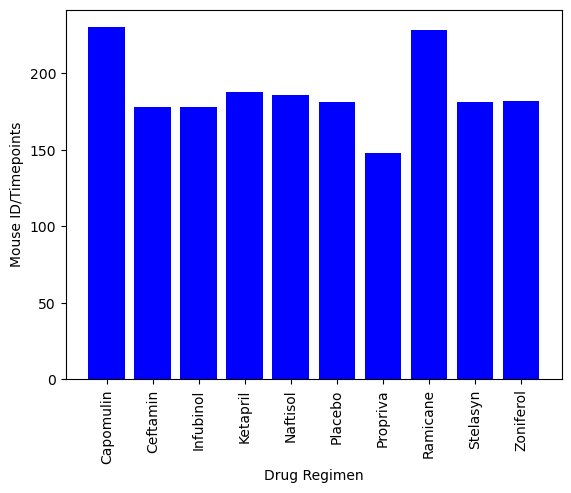

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_list = clean_mouseid_df["Drug Regimen"].value_counts().sort_index()
# drug_count_list
x_axis = drug_count_list.index
x_axis
y_axis = drug_count_list.values
y_axis

plt.bar(x_axis, y_axis, color="b", alpha = 1, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID/Timepoints")
plt.xticks(rotation="vertical")
plt.show()

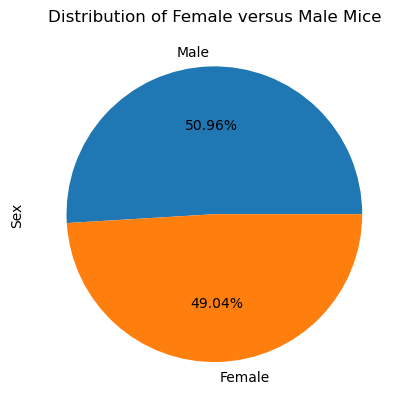

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_mouseid_df["Sex"].value_counts()
gender_distribution.plot(kind="pie",autopct="%1.2f%%")
plt.title("Distribution of Female versus Male Mice")
plt.show()

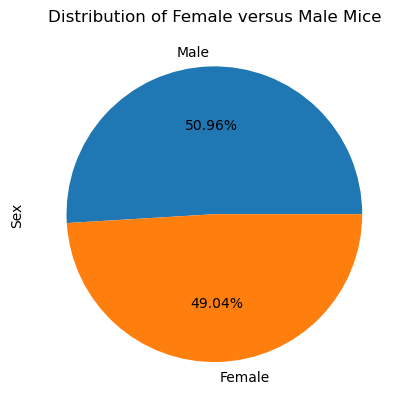

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_type = gender_distribution.index
gender_type
plt.pie(gender_distribution, labels=gender_type, autopct="%1.2f%%")
plt.ylabel("Sex")
plt.title("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_data = clean_mouseid_df.loc[clean_mouseid_df["Drug Regimen"].isin(treatment_regimens)]
# print(treatment_data)

# # Start by getting the last (greatest) timepoint for each mouse
timepoint_max = pd.DataFrame(treatment_data.groupby(["Mouse ID", "Drug Regimen"]).max()["Timepoint"])
# print(timepoint_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timpoint_merge_pd = pd.merge(timepoint_max, clean_mouseid_df, on=("Mouse ID", "Timepoint"), 
                             how="left").drop(columns=["Metastatic Sites","Sex","Age_months","Weight (g)"])
timpoint_merge_pd


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatment_list:
    treatment_drug = timpoint_merge_pd.loc[timpoint_merge_pd["Drug Regimen"] == treatment,:]
    # print(treatment_drug)
    tumor_vol_data = treatment_drug["Tumor Volume (mm3)"]
    # print(tumor_vol_data)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    # print(f"{treatment}:\n{quartiles}")
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # print(f"{treatment}: {iqr}")
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treated_mouse = treatment_drug["Mouse ID"]
    # print(treated_mouse)
    
    # add subset 
    # treated_mouse_tumor = treated_mouse.append(tumor_vol_data)
    treated_mouse_tumor = pd.concat([treated_mouse, tumor_vol_data])
    # print(treated_mouse_tumor)
    # print(f"{treatment}:\n{treated_mouse_tumor}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment}'s potential outliers: {lower_bound:.2f} and {upper_bound:.2f}")



Capomulin's potential outliers: 20.70 and 51.83
Ramicane's potential outliers: 17.91 and 54.31
Infubinol's potential outliers: 36.83 and 82.74
Ceftamin's potential outliers: 25.36 and 87.67


C:\Users\vdumlao\AppData\Local\Temp\ipykernel_21420\3678991001.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatment_list)


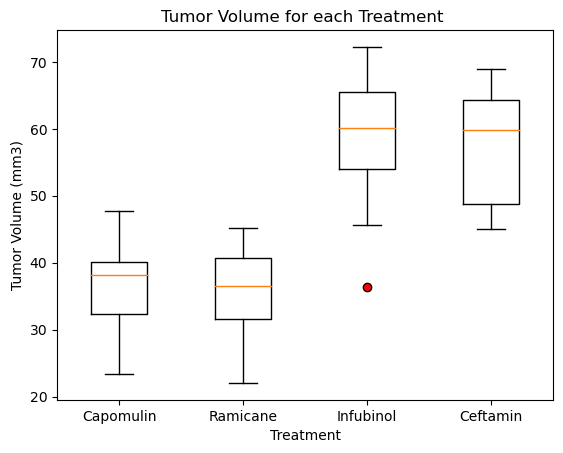

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for treatment in treatment_list:
    treatment_drug = timpoint_merge_pd.loc[timpoint_merge_pd["Drug Regimen"] == treatment,:]
    # print(treatment_drug)
    boxplot_list.append(treatment_drug["Tumor Volume (mm3)"])
    # print(boxplot_list)

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Treatment ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
ax1.set_xticklabels(treatment_list)
ax1.boxplot(boxplot_list, flierprops=dict(markerfacecolor='red'))
plt.show()



## Line and Scatter Plots

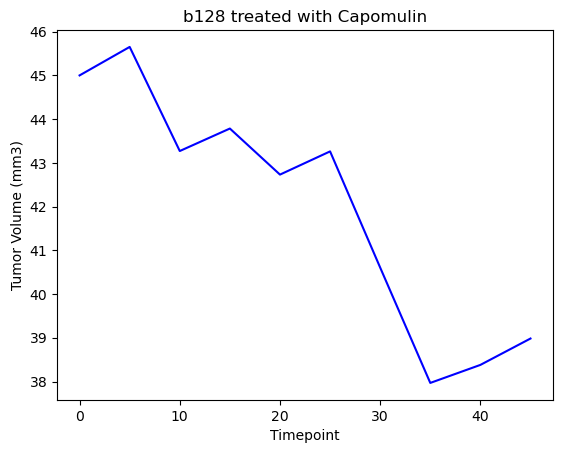

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
select_treatment = "Capomulin"
chosen_treatment = clean_mouseid_df.loc[clean_mouseid_df["Drug Regimen"] == select_treatment,:]
# print(chosen_treatment)
select_mouse = "b128"
chosen_mouse = chosen_treatment.loc[chosen_treatment["Mouse ID"]== select_mouse]
# chosen_mouse

x_axis = chosen_mouse["Timepoint"]
# print(x_axis)
y_axis = chosen_mouse["Tumor Volume (mm3)"]
# print(y_axis)

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Timepoint")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.plot(x_axis, y_axis, color="blue")
ax1.set_title(f"{select_mouse} treated with {select_treatment}")
plt.show()


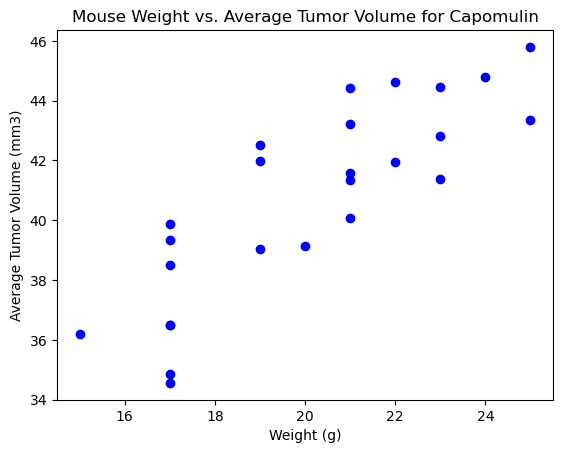

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = chosen_treatment.groupby(["Mouse ID"])[["Weight (g)"]].mean()
# print(mouse_weight)
avg_tumor_vol = chosen_treatment.groupby(["Mouse ID"])[["Tumor Volume (mm3)"]].mean()
# print(avg_tumor_vol)

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")
ax1.scatter(mouse_weight, avg_tumor_vol, color="blue")
ax1.set_title(f"Mouse Weight vs. Average Tumor Volume for {select_treatment}")
plt.show()

## Correlation and Regression

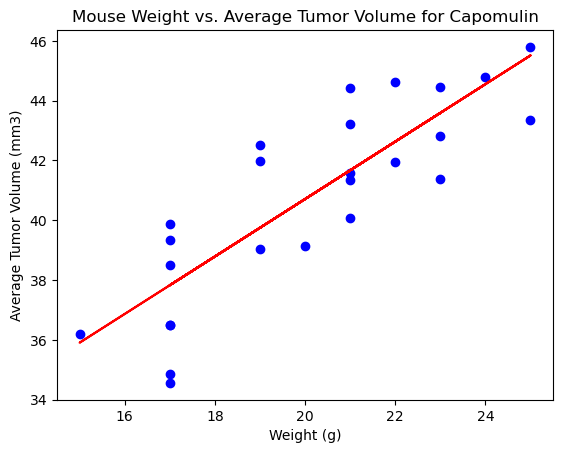

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_mouse = chosen_treatment.iloc[:,7]
tumor_vol_avg = chosen_treatment.iloc[:,2] 
correlation = st.pearsonr(weight_mouse,tumor_vol_avg)
# print(correlation)

tva_slope, tva_int, tva_r, tva_p, tva_std_err = st.linregress(weight_mouse,tumor_vol_avg)
tva_regress = tva_slope * mouse_weight + tva_int
# print(tva_regress)

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")
ax1.scatter(mouse_weight, avg_tumor_vol, color="blue")
ax1.plot(mouse_weight, tva_regress, color="red")
ax1.set_title(f"Mouse Weight vs. Average Tumor Volume for {select_treatment}")

plt.show()